<a href="https://colab.research.google.com/github/AlexeyShv/DataAnalist/blob/main/mini_project_lesson_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, посмотрите на описательную статистику.

Вопрос: Сколько уникальных значений принимает переменная platform?

In [1]:
import pandas as pd

In [4]:
logs = pd.read_csv('/content/logs.csv')
user_data = pd.read_csv('/content/user_data.csv')

In [5]:
logs.shape

(4500, 4)

In [7]:
logs.describe()

,client,time
count,4500.000000,4.500000e+03
mean,50998.758000,1.585440e+09
std,28374.472495,2.314866e+04
min,40.000000,1.585400e+09
25%,27056.500000,1.585420e+09
50%,52659.000000,1.585440e+09
75%,76001.250000,1.585461e+09
max,99993.000000,1.585480e+09


In [8]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [9]:
user_data.shape

(2954, 3)

In [10]:
user_data.describe()

,client,age
count,2954.000000,2954.000000
mean,50767.886594,44.196005
std,28800.505847,14.248336
min,40.000000,20.000000
25%,25639.500000,32.000000
50%,51569.500000,44.000000
75%,75963.250000,56.000000
max,99973.000000,69.000000


In [12]:
logs.platform.nunique()

3

Какой клиент совершил больше всего успешных операций?

Если несколько пользователей совершили одинаковое число успешных действий, перечислите их идентификаторы (client) через запятую и пробел в порядке возрастания.

In [25]:
success_number = logs.query('success == True') \
        .groupby('client') \
        .aggregate({'success': 'count'}) \
        .sort_values('success', ascending= False) \
        .rename(columns={'success': 'success_number'}) \
        .reset_index()

In [28]:
max_success_number = success_number.success_number.max()
max_success_number

41

In [37]:
success_client_id = success_number.query('success_number == @max_success_number').sort_values('client')
success_client_id.client.tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

С какой платформы было совершено наибольшее количество успешных операций?

In [38]:
success_number_platform = logs.query('success == True') \
        .groupby('platform') \
        .aggregate({'success': 'count'}) \
        .sort_values('success', ascending= False) \
        .rename(columns={'success': 'success_number_platform'}) \
        .reset_index()

In [39]:
success_number_platform

,platform,success_number_platform
0,phone,2019
1,computer,1090
2,tablet,180


Какая платформа наиболее популярна среди премиумных клиентов?

In [40]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [41]:
user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [43]:
full_data = logs.merge(user_data, on = 'client')

In [45]:
full_data.query('premium == True').value_counts('platform')

platform
phone       246
computer    150
tablet       24
dtype: int64

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет), используя библиотеку seaborn с параметрами цвета по умолчанию.

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt


<ipython-input-50-7f2e3d259fa9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full_data.query('premium == False').age)
<ipython-input-50-7f2e3d259fa9>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(full_data.query('premium == True').age)


<Axes: xlabel='age', ylabel='Density'>

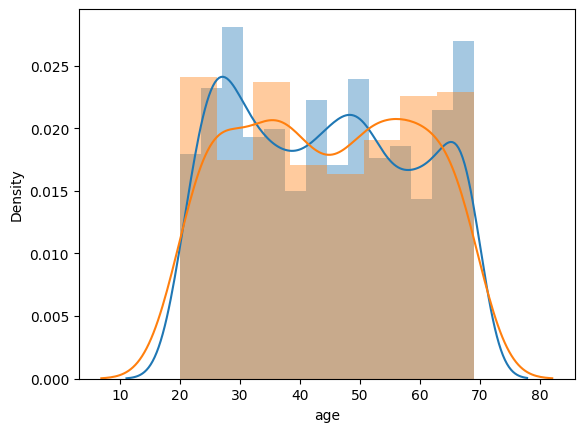

In [50]:
sns.distplot(full_data.query('premium == False').age)
sns.distplot(full_data.query('premium == True').age)

Постройте график распределения числа успешных операций:

x – число успешных операций
y – число клиентов, совершивших такое количество успешных операций

In [55]:
success_operation = logs.query('success == True').groupby('client').aggregate({'success': 'count'}).reset_index()

<ipython-input-58-d99afe8ef4c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(success_operation.success)


<Axes: xlabel='success', ylabel='Density'>

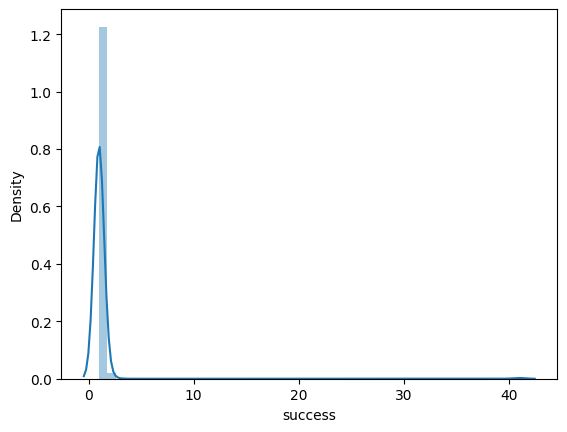

In [58]:
sns.distplot(success_operation.success)

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, по оси y – число успешных операций.

In [65]:
computer_success = full_data.query('platform == "computer" and success == True')
computer_success

,client,success,platform,time,premium,age
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
7,61468,True,computer,1585416826,False,25
11,61468,True,computer,1585428874,False,25
...,...,...,...,...,...,...
3409,4293,True,computer,1585403129,False,29
3425,16540,True,computer,1585456144,False,49
3432,85769,True,computer,1585447052,False,46
3433,81031,True,computer,1585401631,False,45


In [74]:
full_data.head()

,client,success,platform,time,premium,age
0,61468,True,phone,1585425658,False,25
1,61468,True,computer,1585460504,False,25
2,61468,True,computer,1585430291,False,25
3,61468,True,computer,1585444317,False,25
4,61468,True,phone,1585441266,False,25


In [76]:
age_v_number = full_data.query('platform == "computer"').groupby('age').aggregate({'success': 'count'}).reset_index()

<Axes: xlabel='age', ylabel='success'>

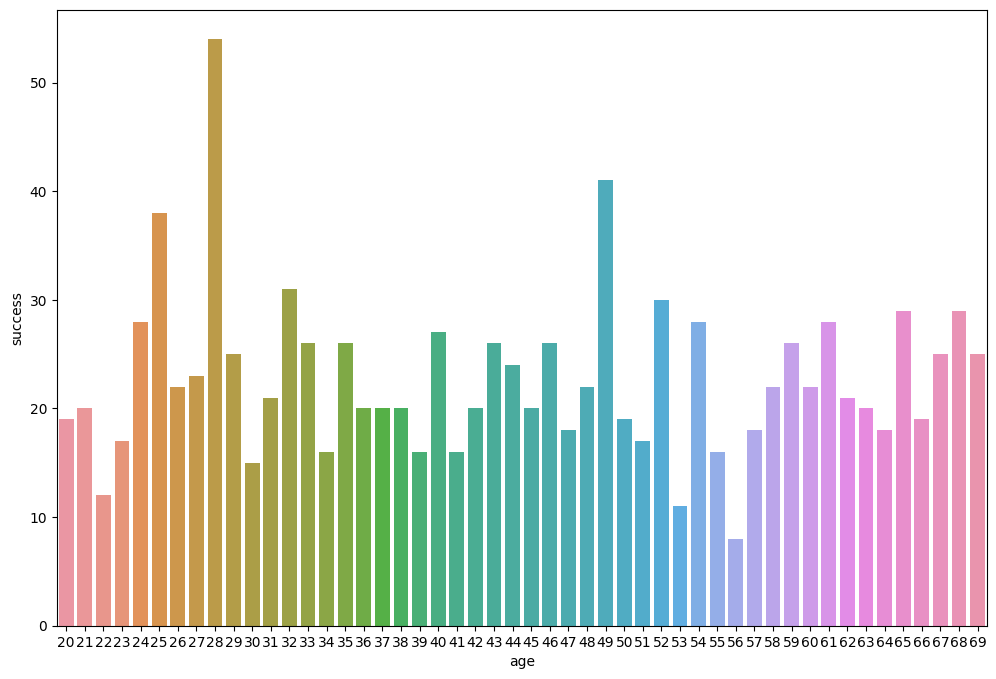

In [80]:
plt.figure(figsize=(12, 8))
sns.barplot(x= 'age', y = 'success', data = age_v_number)